### Testing the lognormal assumption for stock returns
One of the assumptions of the black scholes model is log-normal returns on the underlying so here I will try and see if the distribution of the log returns looks normal. First, we'll try with some MSFT stock data. Then, with an index fund.

In [35]:
import pandas as pd
import requests as req
import numpy as np
import quandl

from datetime import datetime, timedelta

# api_key = **REDACTED**

query_url = 'https://www.alphavantage.co/query'
function = 'TIME_SERIES_INTRADAY'
symbol = 'NFLX'
interval = '1min'
output_size = 'full'

# let's read in the stock data for today
qstring = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&outputsize=full&apikey=demo'
qstring2 = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval={interval}&output_size={output_size}&apikey={api_key}'

response = req.get(qstring)

In [36]:
# pd.from_json(response.text)

time_series = response.json()['Time Series (5min)']
stocks = pd.DataFrame.from_dict(time_series).T

stocks = stocks.reset_index()
stocks['timestamp'] = stocks['index']\
                        .pipe(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

# get rid of the old timestamp
# cast the columns to be numeric
# get rid of the pesky number in '1. open' or '2. high', etc
stocks = stocks\
            .set_index('timestamp')\
            .drop('index', axis=1)\
            .apply(pd.to_numeric)\
            .rename(lambda s: s.split()[-1].strip(), axis='columns')

stocks.head()
# len(stocks)

,open,high,low,close,volume
timestamp,,,,,
2019-02-08 16:00:00,105.17,105.7800,105.1000,105.75,1760287
2019-02-08 15:55:00,105.11,105.2500,105.1100,105.18,330334
2019-02-08 15:50:00,105.08,105.1700,105.0551,105.10,250878
2019-02-08 15:45:00,105.14,105.1400,105.0500,105.09,164148
2019-02-08 15:40:00,105.14,105.1551,105.0700,105.15,159033


Text(0, 0.5, 'price')

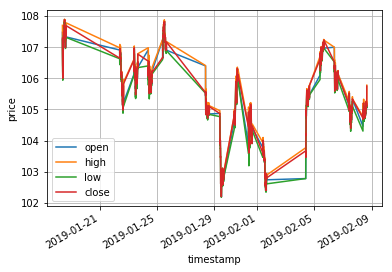

In [37]:
# Let's plot the data over time
stocks[stocks.columns[:-1]].plot(grid=True).set_ylabel('price')

Text(0, 0.5, 'volume(1000s)')

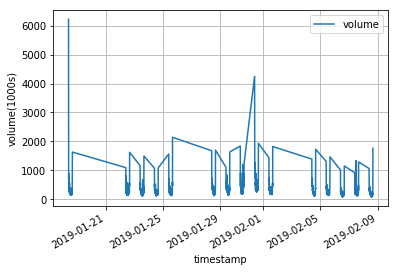

In [38]:
# now let's check out volume

# I convert it to a data frame because it makes the legend by default
stocks.volume\
    .pipe(lambda x: x / 1000)\
    .to_frame()\
    .plot(grid=True)\
    .set_ylabel('volume(1000s)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbee982eb8>,
      dtype=object)

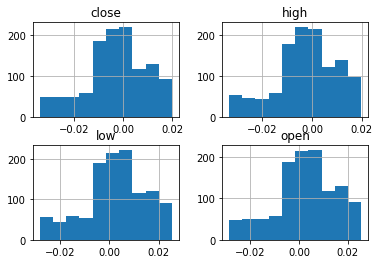

In [39]:
# Now let's check out the lognormal nature of the returns
stock_prices = stocks[stocks.columns[:-1]]
log_prices = np.log(stock_prices)\
                .pipe(lambda df: df.sub(df.iloc[0]))

# ok that looks kinda lognormal lol
log_prices.hist()


In [41]:
import quandl 
stocks = quandl.get("NASDAQOMX/NQUS500LC", authtoken= **REDACTED**)
stocks.head()

,Index Value,High,Low,Total Market Value,Dividend Market Value
Trade Date,,,,,
2018-01-02,1401.60,1401.65,1395.18,2.013357e+13,9.748509e+08
2018-01-03,1410.14,1410.75,1402.57,2.025621e+13,0.000000e+00
2018-01-04,1415.69,1418.59,1412.87,2.033596e+13,4.275579e+09
2018-01-05,1425.26,1425.39,1417.58,2.047334e+13,0.000000e+00
2018-01-08,1427.72,1428.15,1422.54,2.050875e+13,3.515223e+08


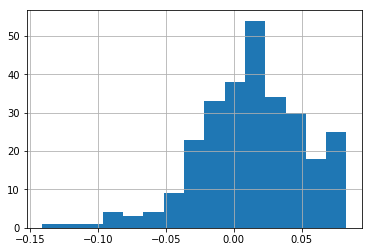

In [42]:
stock_prices = stocks['Index Value']
log_stock_prices = np.log(stock_prices)\
                .pipe(lambda df: df.sub(df.iloc[0]))
log_stock_prices.hist(bins=15)
# This lognormal assumption doesn't appear to be great

In [31]:
# Although it is possible that it's just not good over the period of a month
stocks.reset_index()['Trade Date'].describe()

count                     278
unique                    278
top       2018-01-31 00:00:00
freq                        1
first     2018-01-02 00:00:00
last      2019-02-08 00:00:00
Name: Trade Date, dtype: object